# Random Forest Excerpt from the Data Science Handbook

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called **Bagging**. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a **random forest**.

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

# Below two libraries are to build Decision Tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

### From the Sklearn.ensemble.BaggingClassifier Documentation, the definition of Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

We will use the same dataset that we used for Decision Trees

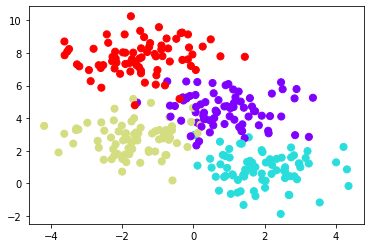

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 300, centers = 4,
                random_state = 0, cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'rainbow')

## Building the Random Forest model 

In [15]:
# tree = DecisionTreeClassifier()
# bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
#                         random_state=1)

bag = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 1)

bag.fit(X, y)

RandomForestClassifier(criterion='entropy', random_state=1)

In the decision Tree section, we wrote some functions to plot the model. We will do the same here too. These functions are taken from the Appendix of the book. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);
    
def visualize_classifier(model, X, y, ax = None): 
    cmap = 'rainbow'
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = cmap,
              clim = (y.min(), y.max()), zorder = 3)
    
    ax.set_title('Decision Tree Visualizing')
    ax.set_ylabel('asdfasdf')
    ax.set_xlabel('asdfasdf')
    
    ax.axis('tight')
    ax.axis('off')
    xaxis = ax.get_xlim()
    yaxis = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xaxis, num = 100),
                        np.linspace(*yaxis, num = 100))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color to plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha = 0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap = cmap, clim=(y.min(), y.max()),
                           zorder = 1)
    ax.set(xlim = xaxis, ylim = yaxis)

<ipython-input-16-6732d5698f9b>:109: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha = 0.3,


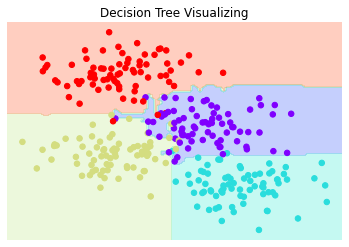

In [17]:
visualize_classifier(bag, X, y)

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. 

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically. All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

<ipython-input-16-6732d5698f9b>:109: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha = 0.3,


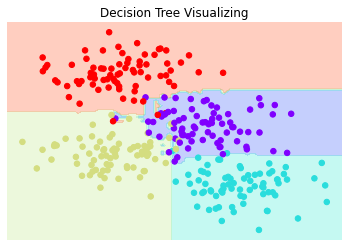

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

## Random Forest Regression

In the previous section we considered random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the RandomForestRegressor, and the syntax is very similar to what we saw earlier.

Consider the following data, drawn from the combination of a fast and slow oscillation:

In [19]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
print(x)

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456 9.69584628 7.75132823 9.39498942 8.9482735
 5.97899979 9.21874235 0.88492502 1.95982862 0.45227289 3.25330331
 3.8867729  2.71349032 8.28737509 3.56753327 2.8093451  5.42696083
 1.40924225 8.02196981 0.74550644 9.86886937 7.72244769 1.98715682
 0.05522117 8.15461428 7.06857344 7.29007168 7.71270347 0.74044652
 3.58465729 1.1586906  8.63103426 6.23298127 3.30898025 0.6355835
 3.10982322 3.25183322 7.29606178 6.37557471 8.87212743 4.72214925

In [20]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

Text(0.5, 1.0, 'Oscillation Error Plot')

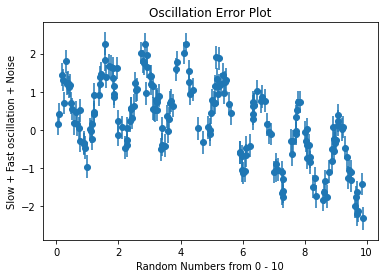

In [21]:
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')
plt.ylabel('Slow + Fast oscillation + Noise')
plt.xlabel('Random Numbers from 0 - 10')
plt.title('Oscillation Error Plot')

Using the **random forest regressor**, we can find the best fit curve as follows:

Text(0.5, 1.0, 'Oscillation Error Plot')

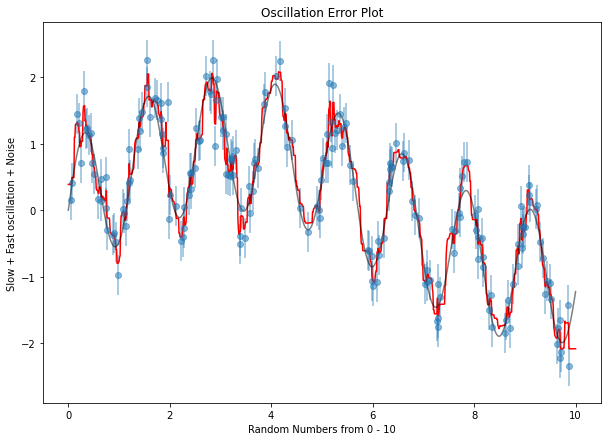

In [22]:
# import the library
from sklearn.ensemble import RandomForestRegressor

# Construct the regressor, 200 represents the number of decision trees
forest = RandomForestRegressor(200)

# Build the model
forest.fit(x[:, None], y)  # do not know what does None mean here yet

xfit = np.linspace(0, 10, 1000)         # x-axis points
yfit = forest.predict(xfit[:, None])    # y-axis 
ytrue = model(xfit, sigma=0)            # Prediction by the model
plt.figure(figsize=(10,7))              # size of the plot

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)    # Plot the x array and y array values. Do not know what 0.3 means yet 
plt.plot(xfit, yfit, '-r');                    # Plot the actual values of from the dataset
plt.plot(xfit, ytrue, '-k', alpha=0.5)         # Plot predictions made by the model
plt.ylabel('Slow + Fast oscillation + Noise')
plt.xlabel('Random Numbers from 0 - 10')
plt.title('Oscillation Error Plot')

Here the true model is shown in the smooth gray curve, while the random forest model is shown by the jagged red curve. As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us needing to specifying a multi-period model!